# The Sparks Foundation - Data Science & Business Analytics Internship

## Task - 8: Timeline Analysis : Covid-19

### Objective: 

- Create a storyboard showing spread of Covid-19 cases in your country or any region (Asia, Europe, BRICS etc) using Tableau, Power BI or SAP.

- Use animation, timeline and annotations to create attractive and interactive dashboards and story.

- Identify interesting patterns and possible reasons helping Covid-19 spread with basic as well as advanced charts.

- Screen-record the completed storyboard along with your audio explaining the charts and giving recommendations.


### Author : Kanishka Gour

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
c_data = pd.read_csv("owid-covid-data.csv")
c_data.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
5,AFG,Asia,Afghanistan,2020-02-29,1.0,0.0,0.143,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
6,AFG,Asia,Afghanistan,2020-03-01,1.0,0.0,0.143,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
7,AFG,Asia,Afghanistan,2020-03-02,1.0,0.0,0.000,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
8,AFG,Asia,Afghanistan,2020-03-03,2.0,1.0,0.143,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
9,AFG,Asia,Afghanistan,2020-03-04,4.0,2.0,0.429,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [19]:
c_data.shape

(70024, 59)

In [20]:
c_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70024 entries, 0 to 70023
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               70024 non-null  object 
 1   continent                              66534 non-null  object 
 2   location                               70024 non-null  object 
 3   date                                   70024 non-null  object 
 4   total_cases                            69142 non-null  float64
 5   new_cases                              69140 non-null  float64
 6   new_cases_smoothed                     68139 non-null  float64
 7   total_deaths                           60162 non-null  float64
 8   new_deaths                             60320 non-null  float64
 9   new_deaths_smoothed                    68139 non-null  float64
 10  total_cases_per_million                68763 non-null  float64
 11  ne

In [21]:
c_data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [22]:
c_data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,6.914200e+04,69140.000000,68139.000000,6.016200e+04,60320.000000,68139.000000,68763.000000,68761.000000,67765.000000,59796.000000,...,63918.000000,43674.000000,64521.000000,65316.000000,50809.000000,50112.000000,32357.000000,59148.000000,66538.000000,64500.000000
mean,5.757381e+05,5080.088588,5100.024136,1.762907e+04,130.697281,114.207423,6735.793717,63.744928,63.745087,162.886558,...,19150.072001,13.235039,256.904061,7.788479,10.564253,32.649456,51.048860,3.038840,73.139533,0.728251
std,4.075775e+06,32219.329559,31987.823314,1.022638e+05,719.403793,654.203137,13421.231660,165.739937,138.947446,292.558651,...,19685.739458,19.904910,118.300389,3.922409,10.414041,13.460816,31.770205,2.468807,7.550024,0.150145
min,1.000000e+00,-46076.000000,-1121.714000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2153.437000,-276.825000,0.001000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000
25%,6.710000e+02,1.000000,5.429000,3.500000e+01,0.000000,0.000000,129.218500,0.122000,0.945000,5.218250,...,4541.795000,0.500000,167.295000,5.290000,1.900000,21.600000,20.859000,1.300000,67.440000,0.606000
50%,7.150000e+03,56.000000,67.000000,2.270000e+02,2.000000,1.000000,975.751000,5.903000,7.869000,28.542000,...,12951.839000,2.000000,242.648000,7.110000,6.300000,31.400000,49.839000,2.400000,74.530000,0.748000
75%,7.819525e+04,642.000000,667.286000,2.114750e+03,16.000000,11.714000,6070.314000,52.344000,59.141000,171.336250,...,27216.445000,21.200000,325.721000,10.080000,19.300000,41.100000,83.241000,4.000000,78.730000,0.848000
max,1.107250e+08,879905.000000,738686.000000,2.452150e+06,17838.000000,14374.143000,137772.601000,8652.658000,2648.773000,2121.516000,...,116935.600000,77.600000,724.417000,30.530000,44.000000,78.100000,98.999000,13.800000,86.750000,0.957000


In [23]:
c_data.nunique()

iso_code                                   213
continent                                    6
location                                   213
date                                       416
total_cases                              35970
new_cases                                 9710
new_cases_smoothed                       18416
total_deaths                             13595
new_deaths                                2386
new_deaths_smoothed                       5315
total_cases_per_million                  52890
new_cases_per_million                    30340
new_cases_smoothed_per_million           34088
total_deaths_per_million                 31711
new_deaths_per_million                    6188
new_deaths_smoothed_per_million           7351
reproduction_rate                          352
icu_patients                              2029
icu_patients_per_million                  4156
hosp_patients                             3857
hosp_patients_per_million                 6620
weekly_icu_ad

In [24]:
c_data.isnull().sum()

iso_code                                     0
continent                                 3490
location                                     0
date                                         0
total_cases                                882
new_cases                                  884
new_cases_smoothed                        1885
total_deaths                              9862
new_deaths                                9704
new_deaths_smoothed                       1885
total_cases_per_million                   1261
new_cases_per_million                     1263
new_cases_smoothed_per_million            2259
total_deaths_per_million                 10228
new_deaths_per_million                   10070
new_deaths_smoothed_per_million           2259
reproduction_rate                        13829
icu_patients                             62551
icu_patients_per_million                 62551
hosp_patients                            61142
hosp_patients_per_million                61142
weekly_icu_ad

In [25]:
c_data.continent.value_counts()[0:10]

Africa           18410
Europe           16933
Asia             16778
North America     8200
South America     4268
Oceania           1945
Name: continent, dtype: int64

In [26]:
dataset = c_data[c_data['date']=='2020-11-15']
dataset = dataset[~dataset['location'].isin(['World','International'])]
dataset.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
265,AFG,Asia,Afghanistan,2020-11-15,43240.0,205.0,154.429,1620.0,12.0,7.857,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.511
638,OWID_AFR,NaN,Africa,2020-11-15,1976022.0,12570.0,13308.857,47362.0,296.0,286.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999,ALB,Europe,Albania,2020-11-15,27830.0,597.0,517.714,623.0,11.0,9.143,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795
1360,DZA,Africa,Algeria,2020-11-15,67679.0,860.0,804.000,2154.0,15.0,15.143,...,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88,0.748
1715,AND,Europe,Andorra,2020-11-15,5872.0,147.0,69.857,76.0,1.0,0.143,...,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.868
2052,AGO,Africa,Angola,2020-11-15,13451.0,77.0,145.429,322.0,0.0,2.143,...,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581
2406,ATG,North America,Antigua and Barbuda,2020-11-15,134.0,0.0,0.429,4.0,0.0,0.143,...,21490.943,NaN,191.511,13.17,NaN,NaN,NaN,3.80,77.02,0.778
2822,ARG,South America,Argentina,2020-11-15,1310491.0,5645.0,9758.429,35436.0,129.0,268.000,...,18933.907,0.6,191.032,5.50,16.2,27.7,NaN,5.00,76.67,0.845
3178,ARM,Asia,Armenia,2020-11-15,117337.0,1482.0,1559.000,1763.0,25.0,29.143,...,8787.580,1.8,341.010,7.11,1.5,52.1,94.043,4.20,75.09,0.776
3573,OWID_ASI,NaN,Asia,2020-11-15,15118723.0,81910.0,93796.714,266621.0,1463.0,1556.571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
c_data['location'].value_counts()

Argentina          416
Mexico             416
Thailand           413
Taiwan             401
South Korea        396
                  ... 
Macao               11
Anguilla            10
Northern Cyprus      9
Greenland            1
Saint Helena         1
Name: location, Length: 213, dtype: int64

In [28]:
india=dataset = c_data[c_data["location"]=="India"]
india.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
28743,IND,Asia,India,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
28744,IND,Asia,India,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
28745,IND,Asia,India,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
28746,IND,Asia,India,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
28747,IND,Asia,India,2020-02-03,3.0,1.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645


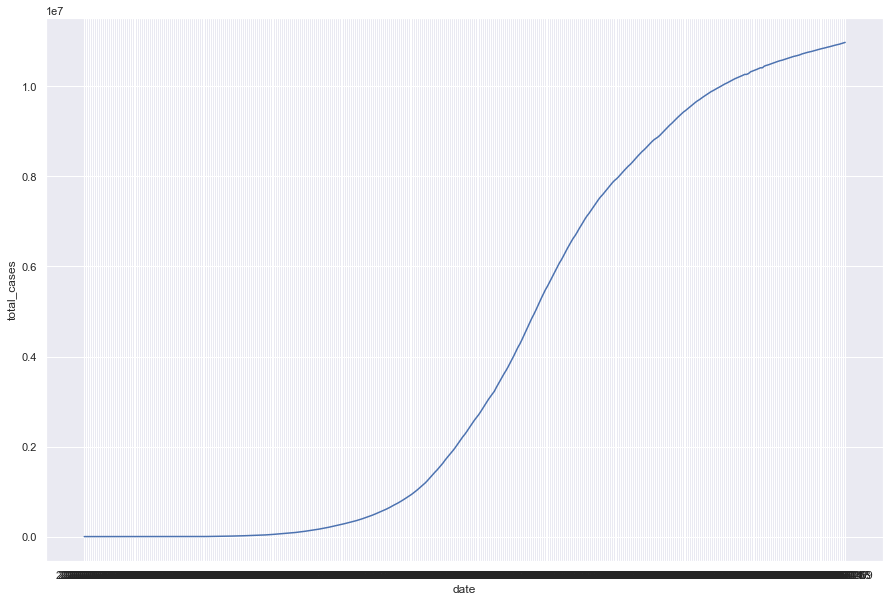

In [29]:
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date", y="total_cases",data=india)
plt.show()

In [30]:
india_last_5_days=india.tail()

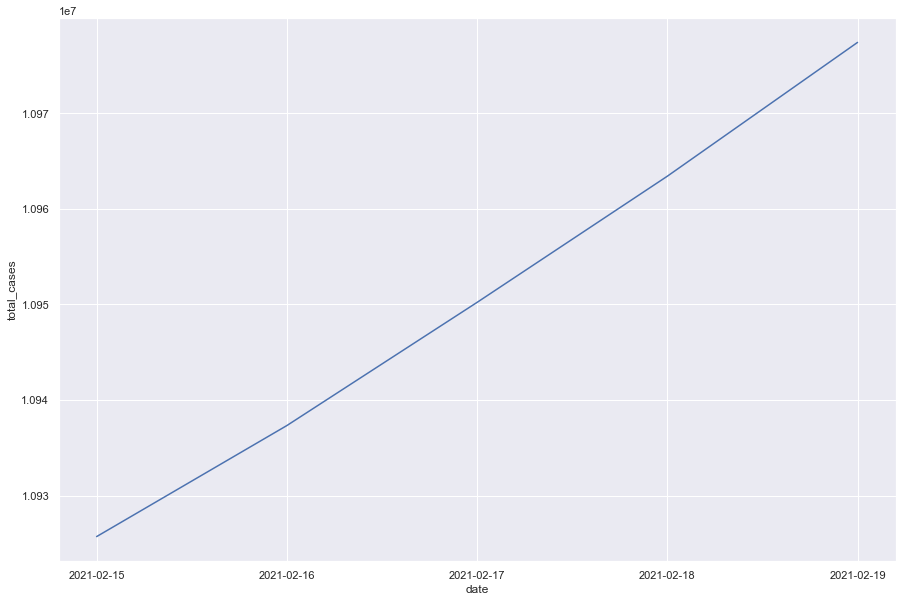

In [31]:
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date", y="total_cases",data=india_last_5_days)
plt.show()

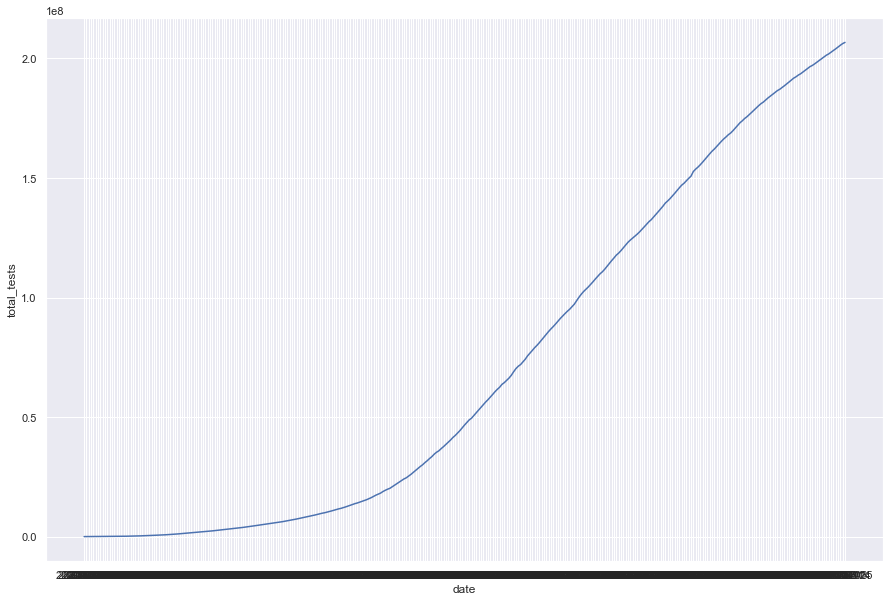

In [32]:
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date", y="total_tests",data=india)
plt.show()

In [34]:
brazil=c_data[c_data["location"]=="Brazil"]

In [35]:
brazil.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
9003,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
9004,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
9005,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
9006,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
9007,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765


In [36]:
brazil.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
9358,BRA,South America,Brazil,2021-02-15,9866710.0,32197.0,48867.143,239773.0,528.0,1177.000,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
9359,BRA,South America,Brazil,2021-02-16,9921981.0,55271.0,46059.429,240940.0,1167.0,1060.000,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
9360,BRA,South America,Brazil,2021-02-17,9978747.0,56766.0,45654.286,242090.0,1150.0,1034.286,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
9361,BRA,South America,Brazil,2021-02-18,10030626.0,51879.0,45245.286,243457.0,1367.0,1036.571,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
9362,BRA,South America,Brazil,2021-02-19,10084208.0,53582.0,45536.143,244737.0,1280.0,1035.429,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765


In [37]:
brazil_last_5_day=brazil.tail()

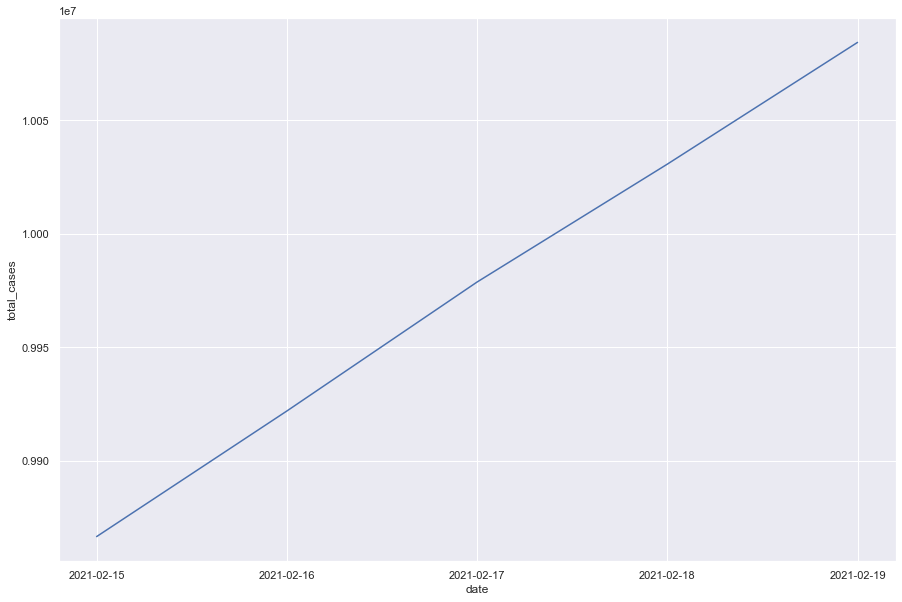

In [38]:
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date", y="total_cases",data=brazil_last_5_day)
plt.show()

In [39]:
last_day_cases=c_data[c_data["date"]==("2020-12-18")]
last_day_cases

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
298,AFG,Asia,Afghanistan,2020-12-18,49621.0,243.0,215.000,2030.0,5.0,12.143,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.511
671,OWID_AFR,NaN,Africa,2020-12-18,2469647.0,19320.0,17818.286,58310.0,496.0,378.286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1032,ALB,Europe,Albania,2020-12-18,52004.0,580.0,734.429,1066.0,11.0,12.714,...,11803.431,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.795
1393,DZA,Africa,Algeria,2020-12-18,94371.0,438.0,464.286,2647.0,7.0,10.286,...,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.748
1748,AND,Europe,Andorra,2020-12-18,7519.0,53.0,40.429,80.0,1.0,0.286,...,NaN,NaN,109.135,7.97,29.000,37.800,NaN,NaN,83.73,0.868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68573,VNM,Asia,Vietnam,2020-12-18,1410.0,3.0,2.714,35.0,0.0,0.000,...,6171.884,2.0,245.465,6.00,1.000,45.900,85.847,2.600,75.40,0.704
68968,OWID_WRL,NaN,World,2020-12-18,75761111.0,719381.0,645058.429,1680847.0,12771.0,11573.000,...,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737
69284,YEM,Asia,Yemen,2020-12-18,2087.0,0.0,0.714,606.0,0.0,0.000,...,1479.147,18.8,495.003,5.35,7.600,29.200,49.542,0.700,66.12,0.470
69623,ZMB,Africa,Zambia,2020-12-18,18575.0,71.0,59.143,373.0,4.0,1.143,...,3689.251,57.5,234.499,3.94,3.100,24.700,13.938,2.000,63.89,0.584


In [40]:
max_cases_country=last_day_cases.sort_values(by="total_cases",ascending=False)
max_cases_country

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
68968,OWID_WRL,NaN,World,2020-12-18,75761111.0,719381.0,645058.429,1680847.0,12771.0,11573.000,...,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737
21702,OWID_EUR,NaN,Europe,2020-12-18,21074547.0,244541.0,212044.714,486362.0,5713.0,4998.429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46325,OWID_NAM,NaN,North America,2020-12-18,20222858.0,276458.0,243086.857,468708.0,3915.0,3529.429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3606,OWID_ASI,NaN,Asia,2020-12-18,19629928.0,100404.0,102874.429,319870.0,1371.0,1446.429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66697,USA,North America,United States,2020-12-18,17546621.0,251161.0,220280.286,319223.0,2949.0,2711.000,...,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86,0.926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67836,VAT,Europe,Vatican,2020-12-18,27.0,0.0,0.000,NaN,NaN,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.12,NaN
57250,SLB,Oceania,Solomon Islands,2020-12-18,17.0,0.0,0.000,NaN,NaN,0.000,...,2205.923,25.1,459.780,18.68,NaN,NaN,35.890,1.400,73.00,0.567
39877,MHL,Oceania,Marshall Islands,2020-12-18,4.0,0.0,0.000,NaN,NaN,0.000,...,3819.202,NaN,557.793,30.53,NaN,NaN,82.502,2.700,73.70,0.704
53569,WSM,Oceania,Samoa,2020-12-18,2.0,0.0,0.000,NaN,NaN,0.000,...,6021.557,NaN,348.977,9.21,16.700,38.100,NaN,NaN,73.32,0.715


In [41]:
max_cases_country[1:6]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
21702,OWID_EUR,NaN,Europe,2020-12-18,21074547.0,244541.0,212044.714,486362.0,5713.0,4998.429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46325,OWID_NAM,NaN,North America,2020-12-18,20222858.0,276458.0,243086.857,468708.0,3915.0,3529.429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3606,OWID_ASI,NaN,Asia,2020-12-18,19629928.0,100404.0,102874.429,319870.0,1371.0,1446.429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66697,USA,North America,United States,2020-12-18,17546621.0,251161.0,220280.286,319223.0,2949.0,2711.000,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
22096,OWID_EUN,NaN,European Union,2020-12-18,13969915.0,157984.0,133727.286,331199.0,4093.0,3516.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


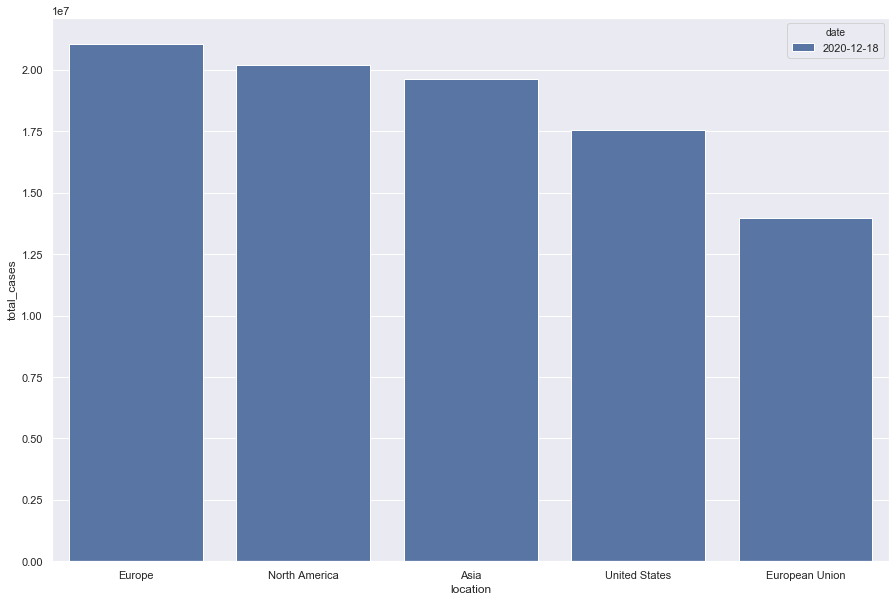

In [42]:
sns.barplot(x="location",y="total_cases",data=max_cases_country[1:6],hue="date")
plt.show()